# IMPACTO DE LA SALUD MENTAL MATERNA EN EL SUEÑO INFANTIL

In [ ]:
import pandas as pd
#import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as st
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

## Limpieza de datos

In [ ]:
df = pd.read_excel('maternal_mental_health_infant_sleep.xlsx'); df.head()

,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_Autre,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1,1,1,1,34,2,NaN,2,5,37.0,...,NaN,7.0,NaN,NaN,7.0,6.0,NaN,10:00:00,3,2
1,2,1,1,1,33,2,NaN,2,5,42.0,...,2.0,3.0,2.0,2.0,2.0,3.0,4.0,11:00:00,0,4
2,3,1,1,1,37,2,NaN,2,5,41.0,...,4.0,4.0,3.0,1.0,4.0,NaN,NaN,12:00:00,1,2
3,4,1,1,1,31,2,NaN,2,5,37.5,...,1.0,3.0,NaN,NaN,NaN,5.0,NaN,11:00:00,2,1
4,5,1,1,1,36,1,NaN,1,5,40.0,...,4.0,2.0,2.0,4.0,5.0,6.0,6.0,10:30:00,1,4


In [ ]:
# Ver si existen datos nulos
df.isnull()

,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_Autre,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,False,False,False,False,False,False,True,False,False,False,...,True,False,True,True,False,False,True,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,True,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,False,False,True,False,False,False
406,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
407,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
408,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Vamos a eliminar la columna 'Marital_status_Autre' porque no tiene ningún dato
df = df.drop(['Marital_status_Autre'], axis=1); df

,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_edit,Education,Gestationnal_age,Type_pregnancy,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1,1,1,1,34,2,2,5,37.0,1,...,NaN,7.0,NaN,NaN,7.0,6.0,NaN,10:00:00,3,2
1,2,1,1,1,33,2,2,5,42.0,1,...,2.0,3.0,2.0,2.0,2.0,3.0,4.0,11:00:00,0,4
2,3,1,1,1,37,2,2,5,41.0,1,...,4.0,4.0,3.0,1.0,4.0,NaN,NaN,12:00:00,1,2
3,4,1,1,1,31,2,2,5,37.5,1,...,1.0,3.0,NaN,NaN,NaN,5.0,NaN,11:00:00,2,1
4,5,1,1,1,36,1,1,5,40.0,1,...,4.0,2.0,2.0,4.0,5.0,6.0,6.0,10:30:00,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,1,1,1,31,2,2,3,39.5,1,...,6.0,6.0,NaN,NaN,4.0,2.0,NaN,09:00:00,1,2
406,407,1,1,1,26,2,2,2,37.0,1,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,12:00:00,0,4
407,408,1,1,1,26,2,2,5,39.0,1,...,1.0,2.0,1.0,3.0,2.0,3.0,2.0,10:00:00,2,5
408,409,1,1,1,27,2,2,5,41.2,1,...,1.0,2.0,1.0,1.0,2.0,2.0,1.0,11:30:00,0,4


In [ ]:
# Los individuos eliminados son los que corresponden al número de participante: 
id_eliminados = df[df.isnull().any(axis=1)]['Participant_number'].tolist()
lista_sin_nan = list(filter(lambda x: not math.isnan(x), id_eliminados))
print(lista_sin_nan)

[1, 3, 4, 6, 7, 9, 10, 11, 14, 15, 22, 23, 25, 30, 37, 38, 43, 44, 46, 47, 49, 53, 59, 61, 62, 66, 70, 72, 74, 75, 77, 82, 83, 89, 92, 94, 95, 96, 99, 100, 103, 106, 107, 108, 109, 110, 113, 115, 118, 119, 121, 122, 123, 125, 128, 129, 130, 134, 136, 138, 140, 141, 142, 143, 144, 147, 148, 151, 153, 160, 161, 164, 166, 168, 169, 170, 171, 174, 176, 178, 183, 186, 190, 191, 192, 194, 196, 199, 203, 206, 208, 210, 215, 217, 219, 220, 221, 223, 225, 227, 228, 231, 232, 235, 236, 238, 241, 245, 246, 248, 249, 251, 254, 255, 257, 258, 260, 261, 262, 264, 267, 268, 274, 276, 278, 279, 280, 282, 283, 284, 285, 287, 289, 292, 293, 294, 297, 299, 303, 304, 305, 306, 307, 311, 313, 314, 315, 318, 320, 323, 325, 327, 328, 329, 331, 332, 335, 337, 338, 340, 346, 349, 350, 351, 354, 355, 356, 357, 359, 362, 364, 365, 367, 369, 371, 372, 375, 377, 379, 380, 382, 385, 386, 388, 389, 390, 391, 396, 399, 401, 402, 404, 406, 410]


In [ ]:
# Eliminamos las filas con datos nulos 
df = df.dropna();df

,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_edit,Education,Gestationnal_age,Type_pregnancy,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
1,2,1,1,1,33,2,2,5,42.0,1,...,2.0,3.0,2.0,2.0,2.0,3.0,4.0,11:00:00,0,4
4,5,1,1,1,36,1,1,5,40.0,1,...,4.0,2.0,2.0,4.0,5.0,6.0,6.0,10:30:00,1,4
7,8,1,1,1,34,2,2,5,39.0,1,...,6.0,2.0,3.0,7.0,6.0,6.0,7.0,10:00:00,1,4
11,12,1,1,1,26,2,2,4,39.4,1,...,3.0,2.0,2.0,2.0,3.0,4.0,3.0,10:00:00,2,4
12,13,1,1,1,24,2,2,5,35.0,1,...,2.0,2.0,1.0,1.0,5.0,2.0,1.0,11:00:00,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,403,1,1,1,33,2,2,5,39.0,1,...,4.0,3.0,1.0,2.0,2.0,3.0,2.0,11:30:00,2,4
404,405,1,1,1,28,2,2,2,41.0,1,...,7.0,2.0,1.0,2.0,2.0,3.0,4.0,10:30:00,0,5
406,407,1,1,1,26,2,2,2,37.0,1,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,12:00:00,0,4
407,408,1,1,1,26,2,2,5,39.0,1,...,1.0,2.0,1.0,3.0,2.0,3.0,2.0,10:00:00,2,5


In [ ]:
# Cambiamos los datos de la variable 'Sleep_night_duration_bb1' de formato '%H:%M:%S' a números decimales
df = df[df['Sleep_night_duration_bb1'] != '99:99']
df['Sleep_night_duration_bb1'] = pd.to_datetime(df['Sleep_night_duration_bb1'], format='%H:%M:%S').dt.time
df['Sleep_night_duration_bb1'] = df['Sleep_night_duration_bb1'].apply(lambda x: x.hour + x.minute / 60)

In [ ]:
# Guardamos el dataset limpio 
df.to_excel('maternal_mental_health_infant_sleep_2.xlsx')

## Composición básica

In [ ]:
df2 = pd.read_excel('maternal_mental_health_infant_sleep_2.xlsx'); df2.head()

,Unnamed: 0,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1,2,1,1,1,33,2,2,5,42.0,...,2,3,2,2,2,3,4,11.0,0,4
1,4,5,1,1,1,36,1,1,5,40.0,...,4,2,2,4,5,6,6,10.5,1,4
2,7,8,1,1,1,34,2,2,5,39.0,...,6,2,3,7,6,6,7,10.0,1,4
3,11,12,1,1,1,26,2,2,4,39.4,...,3,2,2,2,3,4,3,10.0,2,4
4,12,13,1,1,1,24,2,2,5,35.0,...,2,2,1,1,5,2,1,11.0,0,4


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  215 non-null    int64  
 1   Participant_number          215 non-null    int64  
 2   Type_parents                215 non-null    int64  
 3   Birth_1mth_M_inclusion      215 non-null    int64  
 4   Birth_12mth_M_inclusion     215 non-null    int64  
 5   Age                         215 non-null    int64  
 6   Marital_status              215 non-null    int64  
 7   Marital_status_edit         215 non-null    int64  
 8   Education                   215 non-null    int64  
 9   Gestationnal_age            215 non-null    float64
 10  Type_pregnancy              215 non-null    int64  
 11  sex_baby1                   215 non-null    int64  
 12  CBTS_M_3                    215 non-null    int64  
 13  CBTS_M_4                    215 non

In [ ]:
df2.columns

Index(['Unnamed: 0', 'Participant_number', 'Type_parents',
       'Birth_1mth_M_inclusion', 'Birth_12mth_M_inclusion', 'Age',
       'Marital_status', 'Marital_status_edit', 'Education',
       'Gestationnal_age', 'Type_pregnancy', 'sex_baby1', 'CBTS_M_3',
       'CBTS_M_4', 'CBTS_M_5', 'CBTS_M_6', 'CBTS_M_7', 'CBTS_M_8', 'CBTS_M_9',
       'CBTS_M_10', 'CBTS_M_11', 'CBTS_M_12', 'CBTS_13', 'CBTS_14', 'CBTS_15',
       'CBTS_16', 'CBTS_17', 'CBTS_18', 'CBTS_19', 'CBTS_20', 'CBTS_21',
       'CBTS_22', 'EPDS_1', 'EPDS_2', 'EPDS_3', 'EPDS_4', 'EPDS_5', 'EPDS_6',
       'EPDS_7', 'EPDS_8', 'EPDS_9', 'EPDS_10', 'HADS_1', 'HADS_3', 'HADS_5',
       'HADS_7', 'HADS_9', 'HADS_11', 'HADS_13', 'Child_survey_participation',
       'Age_bb', 'IBQ_R_VSF_3_bb1', 'IBQ_R_VSF_4_bb1', 'IBQ_R_VSF_9_bb1',
       'IBQ_R_VSF_10_bb1', 'IBQ_R_VSF_16_bb1', 'IBQ_R_VSF_17_bb1',
       'IBQ_R_VSF_28_bb1', 'IBQ_R_VSF_29_bb1', 'IBQ_R_VSF_32_bb1',
       'IBQ_R_VSF_33_bb1', 'Sleep_night_duration_bb1',
       'night_

In [ ]:
df2.describe()

,Unnamed: 0,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
count,215.000000,215.000000,215.0,215.0,215.0,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,196.679070,197.679070,1.0,1.0,1.0,29.869767,1.967442,1.967442,4.018605,39.240465,...,3.223256,3.074419,2.362791,3.093023,4.255814,4.293023,3.613953,10.352326,1.432558,3.190698
std,119.750458,119.750458,0.0,0.0,0.0,4.555142,0.224359,0.224359,1.045519,1.696337,...,1.930188,1.716889,1.376882,2.129169,1.840523,1.716522,2.134451,1.372500,1.697679,1.379390
min,1.000000,2.000000,1.0,1.0,1.0,19.000000,1.000000,1.000000,1.000000,33.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,1.000000
25%,86.500000,87.500000,1.0,1.0,1.0,27.000000,2.000000,2.000000,3.000000,38.000000,...,2.000000,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,10.000000,0.000000,2.000000
50%,194.000000,195.000000,1.0,1.0,1.0,30.000000,2.000000,2.000000,4.000000,39.200000,...,2.000000,3.000000,2.000000,2.000000,4.000000,4.000000,3.000000,10.500000,1.000000,4.000000
75%,299.500000,300.500000,1.0,1.0,1.0,32.000000,2.000000,2.000000,5.000000,40.500000,...,5.000000,4.000000,3.000000,5.000000,6.000000,6.000000,6.000000,11.000000,2.000000,4.000000
max,408.000000,409.000000,1.0,1.0,1.0,43.000000,3.000000,3.000000,5.000000,43.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,12.000000,10.000000,5.000000


## Tabla de frecuencias

### Frecuencia EPDS_1

In [ ]:
fepds1 = df2['EPDS_1'].value_counts(); fepds1

0    138
1     49
2     27
3      1
Name: EPDS_1, dtype: int64

In [ ]:
labels = ['0','1','2','3']

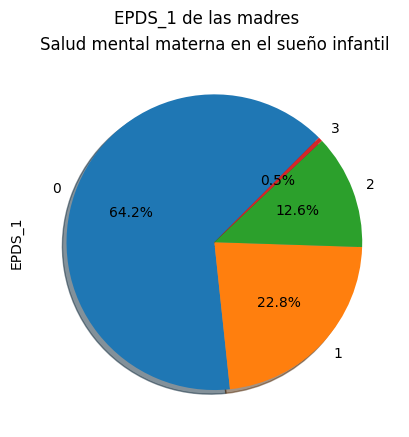

In [ ]:
fepds1.plot(kind='pie', labels=labels, autopct='%1.1f%%',
                 shadow=True, startangle=45)
plt.ylabel("EPDS_1")
plt.suptitle("EPDS_1 de las madres")
plt.title("Salud mental materna en el sueño infantil")
plt.savefig('%EPDS1')

### Frecuencia HADS_1

In [ ]:
fhads1 = df2['HADS_1'].value_counts(); fhads1

1    106
2     52
0     30
3     27
Name: HADS_1, dtype: int64

In [ ]:
labels = ['1','2','0','3']

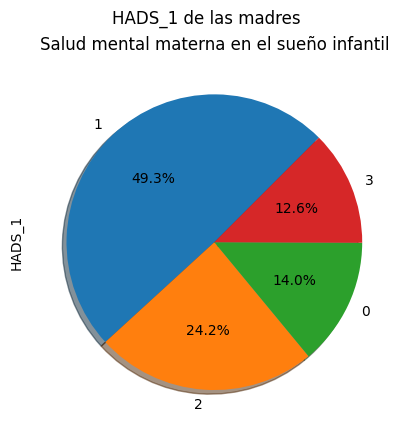

In [ ]:
fhads1.plot(kind='pie', labels=labels, autopct='%1.1f%%',
                 shadow=True, startangle=45)
plt.ylabel("HADS_1")
plt.suptitle("HADS_1 de las madres")
plt.title("Salud mental materna en el sueño infantil")
plt.savefig('%HADS1')

### Frecuencia Age

In [ ]:
fAge = df2['Age'].value_counts().sort_index(); fAge

19     1
20     2
21     3
22     4
23     6
24     8
25     7
26    16
27    22
28    22
29    15
30    13
31    25
32    19
33     7
34    12
35     6
36     8
37     8
38     2
39     2
40     4
41     1
42     1
43     1
Name: Age, dtype: int64

In [ ]:
min_value = df2['Age'].min()
max_value = df2['Age'].max()
step = 3

bins = np.arange(min_value, max_value + step, step)

In [ ]:
etiquetas_edad = pd.cut(df2['Age'], bins=bins)
etiquetas_edad

0      (31, 34]
1      (34, 37]
2      (31, 34]
3      (25, 28]
4      (22, 25]
         ...   
210    (31, 34]
211    (25, 28]
212    (25, 28]
213    (25, 28]
214    (25, 28]
Name: Age, Length: 215, dtype: category
Categories (8, interval[int64, right]): [(19, 22] < (22, 25] < (25, 28] < (28, 31] < (31, 34] <
                                         (34, 37] < (37, 40] < (40, 43]]

In [ ]:
fcuantitativa_Age = etiquetas_edad.value_counts().sort_index(); fcuantitativa_Age

(19, 22]     9
(22, 25]    21
(25, 28]    60
(28, 31]    53
(31, 34]    38
(34, 37]    22
(37, 40]     8
(40, 43]     3
Name: Age, dtype: int64

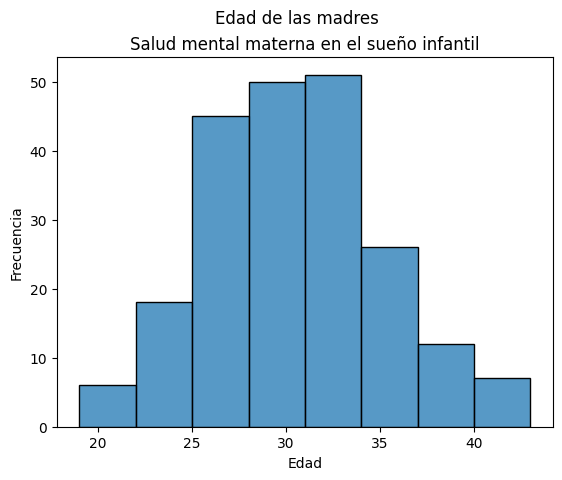

In [ ]:
sns.histplot(data=df2, x="Age", bins=8)
plt.ylabel("Frecuencia")
plt.xlabel("Edad")
plt.suptitle("Edad de las madres")
plt.title("Salud mental materna en el sueño infantil")
plt.savefig('fAge')

### Frecuencia Sleep_night_duration_bb1

In [ ]:
fSleep = df2['Sleep_night_duration_bb1'].value_counts().sort_index(); fSleep

5.00      2
6.00      1
7.00      9
8.00      6
8.50      1
9.00     18
9.50      5
10.00    61
10.50    15
11.00    46
11.25     1
11.50     8
12.00    42
Name: Sleep_night_duration_bb1, dtype: int64

In [ ]:
min_value = df2['Sleep_night_duration_bb1'].min()
max_value = df2['Sleep_night_duration_bb1'].max()
step = 3

bins = np.arange(min_value, max_value + step, step)

In [ ]:
etiquetas_sleep = pd.cut(df2['Sleep_night_duration_bb1'], bins=bins)
etiquetas_sleep

0       (8.0, 11.0]
1       (8.0, 11.0]
2       (8.0, 11.0]
3       (8.0, 11.0]
4       (8.0, 11.0]
           ...     
210    (11.0, 14.0]
211     (8.0, 11.0]
212    (11.0, 14.0]
213     (8.0, 11.0]
214    (11.0, 14.0]
Name: Sleep_night_duration_bb1, Length: 215, dtype: category
Categories (3, interval[float64, right]): [(5.0, 8.0] < (8.0, 11.0] < (11.0, 14.0]]

In [ ]:
fcuantitativa_sleep = etiquetas_sleep.value_counts().sort_index(); fcuantitativa_sleep

(5.0, 8.0]       16
(8.0, 11.0]     146
(11.0, 14.0]     51
Name: Sleep_night_duration_bb1, dtype: int64

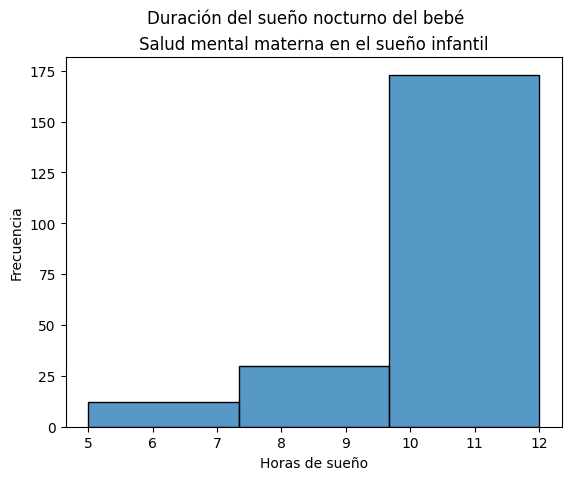

In [ ]:
sns.histplot(data=df2, x="Sleep_night_duration_bb1", bins=3)
plt.ylabel("Frecuencia")
plt.xlabel("Horas de sueño")
plt.suptitle("Duración del sueño nocturno del bebé")
plt.title("Salud mental materna en el sueño infantil")
plt.savefig('fSleep')

## Medidas de Tendencia Central

In [ ]:
def distribucion(variable):
  mc = round(df2[variable].mean(),2)
  mediana = df2[variable].median()
  moda = df2[variable].mode()
  dsc = round(df2[variable].std(),2)
  print(f"""
  ** Medidas de la variable {variable} **
  Media: {mc} 
  Mediana: {mediana}
  Moda: {moda} 
  Desviación estándar:{dsc} """)
  plt.figure()
  sns.kdeplot(df2[variable],shade=True, color="b")
  plt.title('Distribución de la variable {}'.format(variable))
  plt.savefig('{}_distrubucion.png'.format(variable))


  ** Medidas de la variable Age **
  Media: 29.87 
  Mediana: 30.0
  Moda: 0    31
Name: Age, dtype: int64 
  Desviación estándar:4.56 


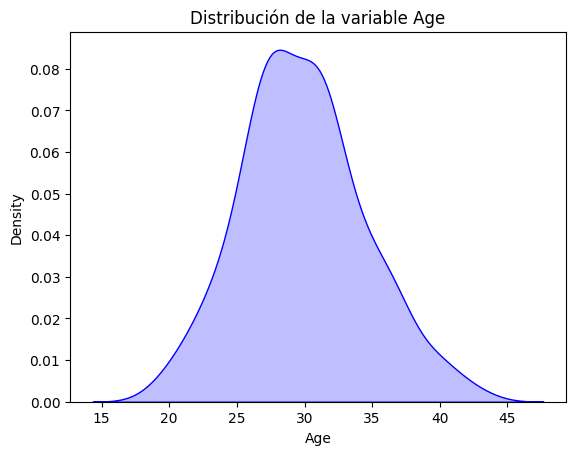

In [ ]:
distribucion('Age')


  ** Medidas de la variable EPDS_1 **
  Media: 0.49 
  Mediana: 0.0
  Moda: 0    0
Name: EPDS_1, dtype: int64 
  Desviación estándar:0.73 


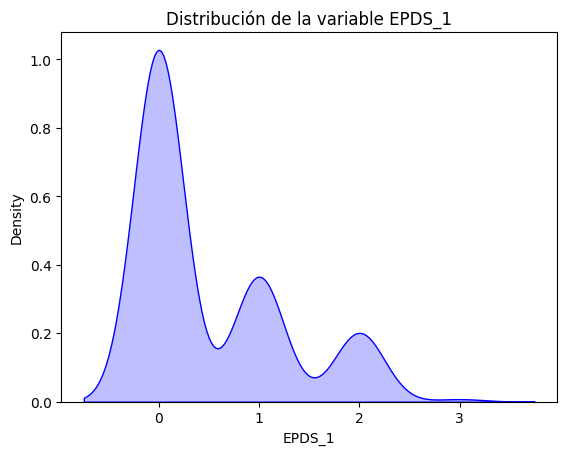

In [ ]:
distribucion('EPDS_1')


  ** Medidas de la variable HADS_1 **
  Media: 1.35 
  Mediana: 1.0
  Moda: 0    1
Name: HADS_1, dtype: int64 
  Desviación estándar:0.87 


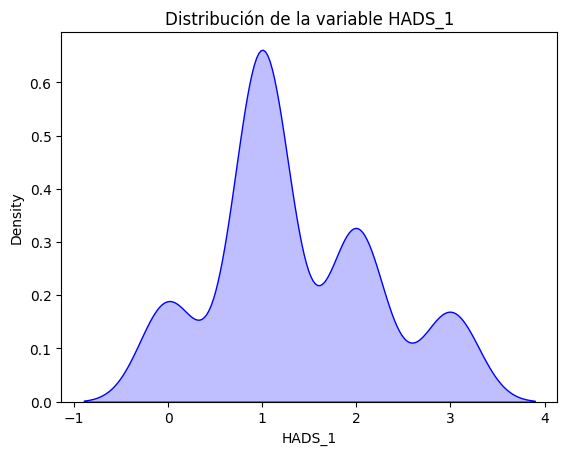

In [ ]:
distribucion('HADS_1')


  ** Medidas de la variable Sleep_night_duration_bb1 **
  Media: 10.35 
  Mediana: 10.5
  Moda: 0    10.0
Name: Sleep_night_duration_bb1, dtype: float64 
  Desviación estándar:1.37 


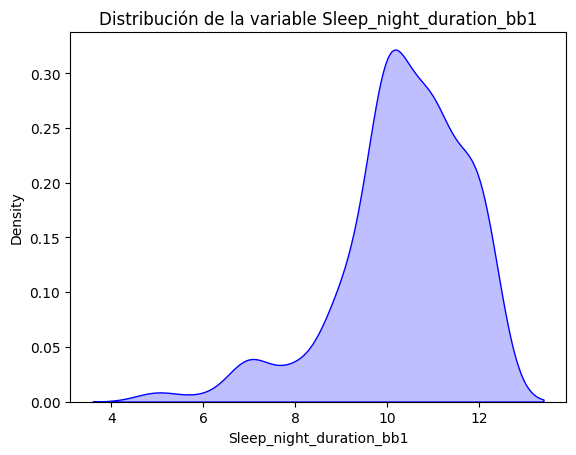

In [ ]:
distribucion('Sleep_night_duration_bb1')

## Rango y rango intercuartil

In [ ]:
def rango(columna):
    maxi = df2[columna].max()
    mini = df2[columna].min()
    rango = maxi - mini
    return rango

In [ ]:
rango('Age') 

24

In [ ]:
rango('EPDS_1') 

3

In [ ]:
rango('HADS_1') 

3

In [ ]:
rango('Sleep_night_duration_bb1') 

7.0

In [ ]:
def rango_intequartil(columna):
    q1 = df2[columna].quantile(.25)
    q3 = df2[columna].quantile(.75)
    riq = q3 - q1
    return riq

In [ ]:
rango_intequartil('Age')

5.0

In [ ]:
rango_intequartil('EPDS_1')

1.0

In [ ]:
rango_intequartil('HADS_1')

1.0

In [ ]:
rango_intequartil('Sleep_night_duration_bb1')

1.0

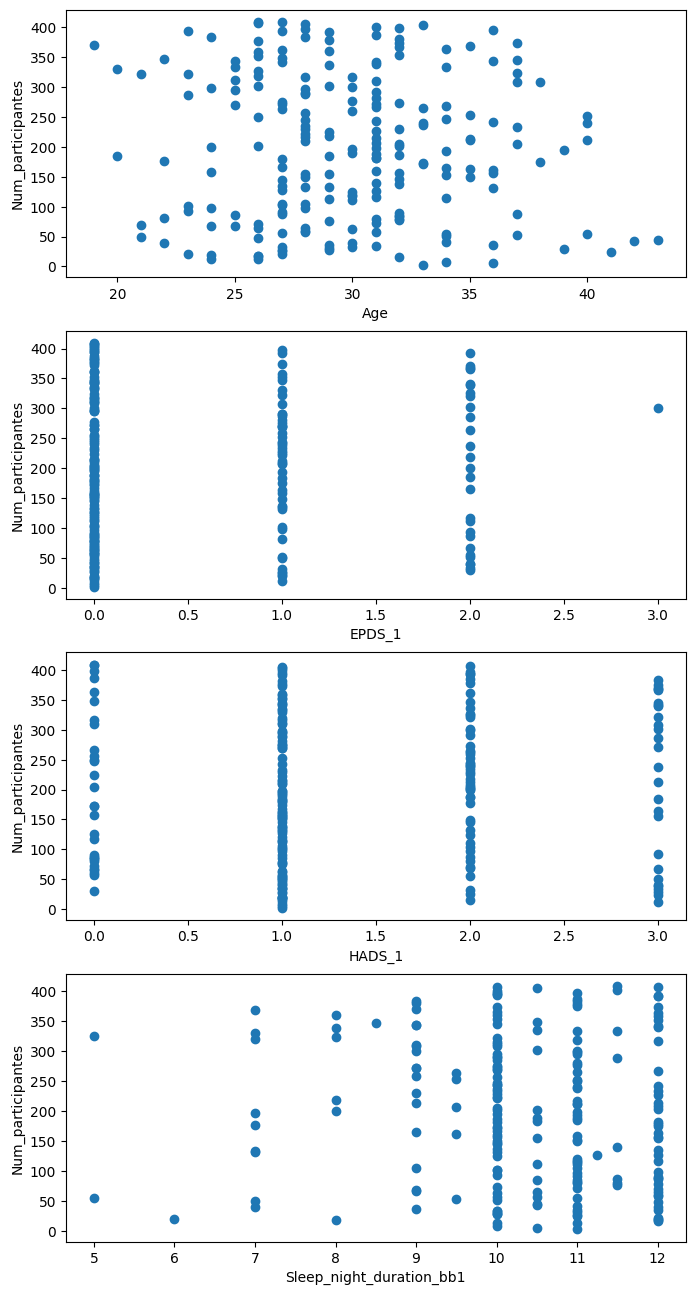

In [ ]:
fig, ax = plt.subplots(4, figsize = (8,16))
ax[0].scatter(x = df2['Age'],y = df2['Participant_number'])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Num_participantes')

ax[1].scatter(x=df2['EPDS_1'], y = df2['Participant_number'])
ax[1].set_xlabel('EPDS_1')
ax[1].set_ylabel('Num_participantes')

ax[2].scatter(x=df2['HADS_1'], y = df2['Participant_number'])
ax[2].set_xlabel('HADS_1')
ax[2].set_ylabel('Num_participantes')

ax[3].scatter(x=df2['Sleep_night_duration_bb1'], y = df2['Participant_number'])
ax[3].set_xlabel('Sleep_night_duration_bb1')
ax[3].set_ylabel('Num_participantes')

plt.show()

## Puntaje Z

In [ ]:
def puntajeZ(columna):
    media = df2[columna].mean()
    ds = df2[columna].std()
    sz = (df2[columna] - media) / ds
    return sz

In [ ]:
puntajeZ('Age')

0      0.687187
1      1.345783
2      0.906719
3     -0.849538
4     -1.288603
         ...   
210    0.687187
211   -0.410474
212   -0.849538
213   -0.849538
214   -0.630006
Name: Age, Length: 215, dtype: float64

In [ ]:
puntajeZ('EPDS_1')

0     -0.676268
1     -0.676268
2     -0.676268
3      0.695407
4     -0.676268
         ...   
210   -0.676268
211   -0.676268
212   -0.676268
213   -0.676268
214   -0.676268
Name: EPDS_1, Length: 215, dtype: float64

In [ ]:
puntajeZ('HADS_1')

0     -0.404863
1     -0.404863
2     -0.404863
3      1.885811
4     -0.404863
         ...   
210   -0.404863
211   -0.404863
212    0.740474
213   -1.550201
214   -1.550201
Name: HADS_1, Length: 215, dtype: float64

In [ ]:
puntajeZ('Sleep_night_duration_bb1')

0      0.471894
1      0.107595
2     -0.256704
3     -0.256704
4      0.471894
         ...   
210    0.836193
211    0.107595
212    1.200491
213   -0.256704
214    0.836193
Name: Sleep_night_duration_bb1, Length: 215, dtype: float64

## Teorema de Chevyshev

In [ ]:
# Graficar el teorema de Chevyshev
def chebyshev(variable):
  mc = round(df2[variable].mean(),2)
  dsc = round(df2[variable].std(),2)
  k = 2
  lim_i = mc - k * dsc
  lim_s = mc + k * dsc

  plt.figure()
  sns.kdeplot(df2[variable],shade=True, color="b")
  plt.title('Distribución de la variable {}'.format(variable))
  plt.ylabel('Densidad')
  plt.title('Distribución')
  plt.axvline(lim_i, color='red', linestyle='--', label=f'{k} desviaciones estándar')
  plt.axvline(lim_s, color='red', linestyle='--')
  plt.legend()
  plt.savefig('{}_cheb.png'.format(variable))

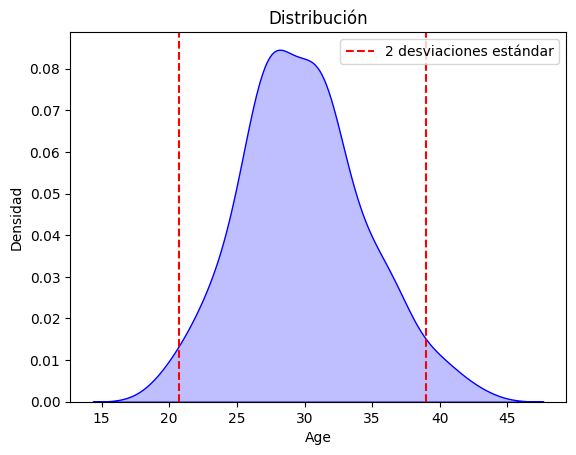

In [ ]:
chebyshev('Age')

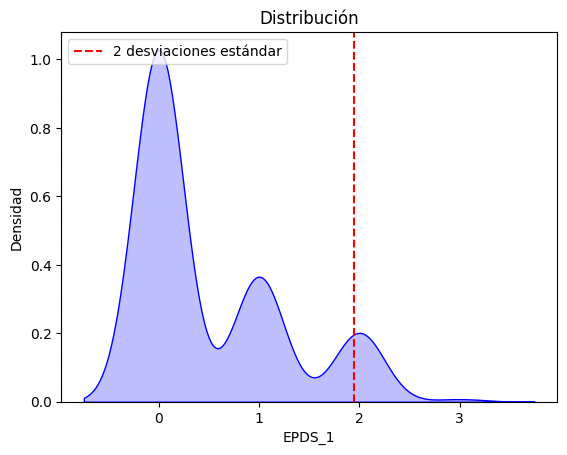

In [ ]:
chebyshev('EPDS_1')

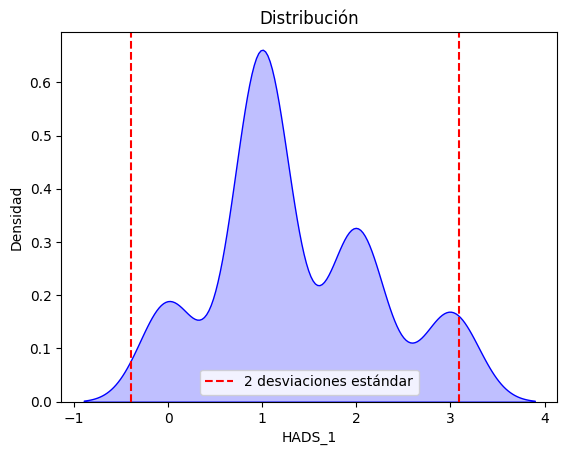

In [ ]:
chebyshev('HADS_1')

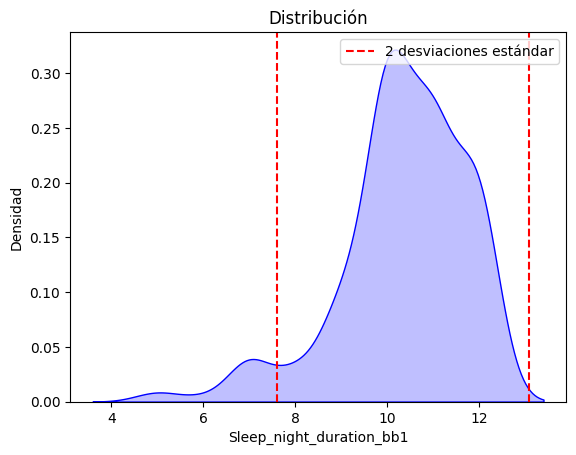

In [ ]:
chebyshev('Sleep_night_duration_bb1')

## Correlación

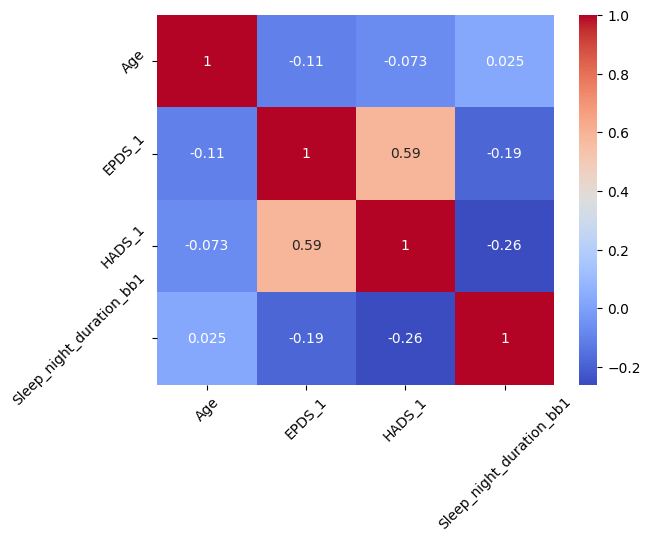

In [ ]:
# Obtener la matriz de correlación
correlation_matrix = df2[['Age', 'EPDS_1', 'HADS_1', 'Sleep_night_duration_bb1']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.savefig('corr.png')


## Muestreo

### Muestreo Aleatorio

In [ ]:
def medidas(data,variable):
  media = data[variable].mean()
  mediana = data[variable].median()
  moda = data[variable].mode()
  std = data[variable].std()
  print('Las medias de la variable {} son:'.format(variable))
  print("""
    Media: %f
    Mediana: %f
    Moda: %f
    Desviación estándar: %f
""" % (media,mediana,moda,std))

In [ ]:
muestra_aleatoria = df2.sample(frac=0.3)
muestra_aleatoria

,Unnamed: 0,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
125,225,226,1,1,1,31,2,2,5,41.0,...,1,3,5,1,3,1,1,12.0,1,4
205,393,394,1,1,1,27,2,2,3,36.3,...,1,2,1,5,4,6,6,10.0,2,2
103,186,187,1,1,1,32,2,2,5,37.0,...,2,6,6,1,4,5,4,10.0,0,2
74,131,132,1,1,1,29,2,2,5,41.4,...,6,7,1,1,7,7,2,10.0,4,2
86,155,156,1,1,1,32,2,2,4,40.5,...,2,1,1,2,6,5,3,12.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,38,39,1,1,1,30,2,2,5,39.0,...,4,5,2,5,6,4,5,7.0,0,5
76,134,135,1,1,1,27,2,2,3,40.5,...,2,4,4,2,3,4,2,12.0,1,3
116,208,209,1,1,1,28,2,2,5,39.4,...,5,4,2,1,4,5,2,12.0,1,5
30,51,52,1,1,1,37,1,1,4,42.2,...,2,2,2,5,2,4,7,9.5,3,4


In [ ]:
print("Medidad muestrales")
medidas(muestra_aleatoria,'Age')

Medidad muestrales
Las medias de la variable Age son:

    Media: 30.531250
    Mediana: 29.500000
    Moda: 28.000000
    Desviación estándar: 4.155580



In [ ]:
print("Medidad muestrales")
medidas(muestra_aleatoria,'EPDS_1')

Medidad muestrales
Las medias de la variable EPDS_1 son:

    Media: 0.421875
    Mediana: 0.000000
    Moda: 0.000000
    Desviación estándar: 0.585667



In [ ]:
print("Medidad muestrales")
medidas(muestra_aleatoria,'HADS_1')

Medidad muestrales
Las medias de la variable HADS_1 son:

    Media: 1.250000
    Mediana: 1.000000
    Moda: 1.000000
    Desviación estándar: 0.835711



In [ ]:
print("Medidad muestrales")
medidas(muestra_aleatoria,'Sleep_night_duration_bb1')

Medidad muestrales
Las medias de la variable Sleep_night_duration_bb1 son:

    Media: 10.527344
    Mediana: 10.500000
    Moda: 10.000000
    Desviación estándar: 1.168466



### Muestreo estratificado

In [63]:
df2.Age.value_counts()/ df2.shape[0]

31    0.116279
27    0.102326
28    0.102326
32    0.088372
26    0.074419
29    0.069767
30    0.060465
34    0.055814
36    0.037209
24    0.037209
37    0.037209
25    0.032558
33    0.032558
23    0.027907
35    0.027907
22    0.018605
40    0.018605
21    0.013953
39    0.009302
38    0.009302
20    0.009302
42    0.004651
43    0.004651
41    0.004651
19    0.004651
Name: Age, dtype: float64

In [64]:
muestra_estratificada = df2.groupby("Age").apply(lambda x: x.sample(frac=0.3))
muestra_estratificada

Unnamed: 0  Participant_number  Type_parents  Birth_1mth_M_inclusion  \
Age                                                                             
20  102         184                 185             1                       1   
21  42           68                  69             1                       1   
22  97          176                 177             1                       1   
23  153         285                 286             1                       1   
    170         320                 321             1                       1   
...             ...                 ...           ...                     ...   
37  128         232                 233             1                       1   
    172         323                 324             1                       1   
38  96          174                 175             1                       1   
39  107         194                 195             1                       1   
40  131         238                 239             1                       1   

         Birth_12mth_M_inclusion  Age  Marital_status  Marital_status_edit  \
Age                                                                          
20  102                        1   20               2                    2   
21  42                         1   21               2                    2   
22  97                         1   22               2                    2   
23  153                        1   23               2                    2   
    170                        1   23               2                    2   
...                          ...  ...             ...                  ...   
37  128                        1   37               2                    2   
    172                        1   37               2                    2   
38  96                         1   38               2                    2   
39  107                        1   39               2                    2   
40  131                        1   40               2                    2   

         Education  Gestationnal_age  ...  IBQ_R_VSF_10_bb1  IBQ_R_VSF_16_bb1  \
Age                                   ...                                       
20  102          2              40.0  ...                 2                 2   
21  42           3              38.0  ...                 3                 3   
22  97           3              39.5  ...                 6                 7   
23  153          3              37.0  ...                 2                 2   
    170          3              40.0  ...                 2                 6   
...            ...               ...  ...               ...               ...   
37  128          3              40.5  ...                 7                 3   
    172          5              37.0  ...                 2                 3   
38  96           3              41.0  ...                 2                 1   
39  107          5              39.0  ...                 1                 3   
40  131          4              41.1  ...                 6                 3   

         IBQ_R_VSF_17_bb1  IBQ_R_VSF_28_bb1  IBQ_R_VSF_29_bb1  \
Age                                                             
20  102                 2                 2                 2   
21  42                  1                 1                 5   
22  97                  2                 4                 7   
23  153                 2                 3                 3   
    170                 2                 1                 5   
...                   ...               ...               ...   
37  128                 2                 6                 7   
    172                 4                 3                 2   
38  96                  7                 2                 2   
39  107                 2                 6                 5   
40  131                 2                 7                 5   

         IBQ_R_VSF_32_bb1  IBQ_R_VSF_33_

In [ ]:
print("Medidad muestrales")
medidas(muestra_estratificada,'Age')

Medidad muestrales
Las medias de la variable Age son:

    Media: 29.738462
    Mediana: 30.000000
    Moda: 31.000000
    Desviación estándar: 4.356306



In [ ]:
print("Medidad muestrales")
medidas(muestra_estratificada,'EPDS_1')

Medidad muestrales
Las medias de la variable EPDS_1 son:

    Media: 0.430769
    Mediana: 0.000000
    Moda: 0.000000
    Desviación estándar: 0.611587



In [ ]:
print("Medidad muestrales")
medidas(muestra_estratificada,'HADS_1')

Medidad muestrales
Las medias de la variable HADS_1 son:

    Media: 1.353846
    Mediana: 1.000000
    Moda: 1.000000
    Desviación estándar: 0.799038



In [ ]:
print("Medidad muestrales")
medidas(muestra_estratificada,'Sleep_night_duration_bb1')

Medidad muestrales
Las medias de la variable Sleep_night_duration_bb1 son:

    Media: 10.442308
    Mediana: 10.500000
    Moda: 10.000000
    Desviación estándar: 1.409212



### Muestreo sistematico

In [ ]:
muestra_aleatoria

,Unnamed: 0,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
125,225,226,1,1,1,31,2,2,5,41.0,...,1,3,5,1,3,1,1,12.0,1,4
205,393,394,1,1,1,27,2,2,3,36.3,...,1,2,1,5,4,6,6,10.0,2,2
103,186,187,1,1,1,32,2,2,5,37.0,...,2,6,6,1,4,5,4,10.0,0,2
74,131,132,1,1,1,29,2,2,5,41.4,...,6,7,1,1,7,7,2,10.0,4,2
86,155,156,1,1,1,32,2,2,4,40.5,...,2,1,1,2,6,5,3,12.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,38,39,1,1,1,30,2,2,5,39.0,...,4,5,2,5,6,4,5,7.0,0,5
76,134,135,1,1,1,27,2,2,3,40.5,...,2,4,4,2,3,4,2,12.0,1,3
116,208,209,1,1,1,28,2,2,5,39.4,...,5,4,2,1,4,5,2,12.0,1,5
30,51,52,1,1,1,37,1,1,4,42.2,...,2,2,2,5,2,4,7,9.5,3,4


In [ ]:
def m_sistematico(df: pd.DataFrame, k: int, n:int) -> pd.DataFrame:
    """
    PARAMETROS
    @ df: tabla que quiero muestrar
    @ k: cantidad de filas que me voy a saltar
    @ n: cantidad de datos
    """
    
    idx_inicio = int(np.random.choice(df.shape[0], 1))
    idxs = [idx_inicio]
    
    for i in range(n-1):
        idxs.append((idxs[-1]+k)%df.shape[0])
        
    
    return df.iloc[idxs]

In [ ]:
muestra_sistematica = m_sistematico(df2, 20, muestra_aleatoria.shape[0])
muestra_sistematica

,Unnamed: 0,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
212,406,407,1,1,1,26,2,2,2,37.0,...,1,2,1,1,1,2,1,12.0,0,4
17,31,32,1,1,1,27,2,2,4,39.5,...,2,5,3,1,1,4,3,10.0,0,4
37,62,63,1,1,1,30,2,2,3,40.0,...,2,1,3,2,2,2,1,10.0,0,4
57,92,93,1,1,1,23,1,1,3,42.0,...,7,6,2,2,7,6,2,10.0,4,5
77,136,137,1,1,1,32,2,2,3,39.2,...,1,2,3,1,6,5,2,10.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,184,185,1,1,1,20,2,2,2,40.0,...,2,2,2,2,2,3,4,11.0,3,5
122,217,218,1,1,1,29,2,2,4,41.1,...,2,3,1,5,6,6,7,8.0,3,4
142,262,263,1,1,1,27,2,2,5,40.3,...,7,7,1,6,6,7,7,9.5,3,5
162,301,302,1,1,1,29,2,2,5,37.0,...,2,2,1,2,4,5,4,10.5,2,4


In [ ]:
print("Medidad muestrales")
medidas(muestra_sistematica,'Age')

Medidad muestrales
Las medias de la variable Age son:

    Media: 28.640625
    Mediana: 28.000000
    Moda: 26.000000
    Desviación estándar: 4.664514



In [ ]:
print("Medidad muestrales")
medidas(muestra_sistematica,'EPDS_1')

Medidad muestrales
Las medias de la variable EPDS_1 son:

    Media: 0.625000
    Mediana: 0.000000
    Moda: 0.000000
    Desviación estándar: 0.863731



In [ ]:
print("Medidad muestrales")
medidas(muestra_sistematica,'HADS_1')

Medidad muestrales
Las medias de la variable HADS_1 son:

    Media: 1.671875
    Mediana: 2.000000
    Moda: 2.000000
    Desviación estándar: 0.909468



In [ ]:
print("Medidad muestrales")
medidas(muestra_sistematica,'Sleep_night_duration_bb1')

Medidad muestrales
Las medias de la variable Sleep_night_duration_bb1 son:

    Media: 9.980469
    Mediana: 10.000000
    Moda: 10.000000
    Desviación estándar: 1.426996



### Muestras

Vamos a tomar 5 muestras de tamaño 30 del dataset, ya que según el teorema del límite central, mientras mayor sea el tamaño de la muestra, más cerca estará la distribución muestral de ser normal.

In [ ]:
muestras = []
medias = []

def muestreo(numMuestra,sizeMuestra,variable):
  for i in range(numMuestra):
    muestra = df2.sample(n=sizeMuestra)
    media = muestra[variable].mean()
    medias.append(media)
    muestras.append(muestra)

  sns.kdeplot(medias, shade=True, color="r")
  plt.title("""
  Distribución de la media muestral de la variable {}""".format(variable))
  plt.xlabel('Valor')
  plt.ylabel('Densidad')
  plt.savefig('{}_muestra_{}.png'.format(variable, sizeMuestra))

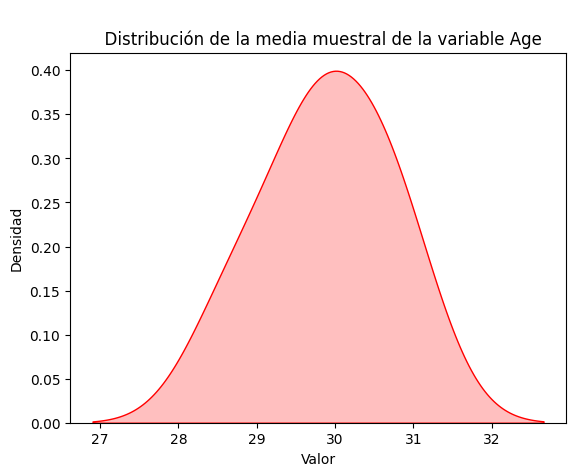

In [ ]:
muestreo(5,30,'Age')

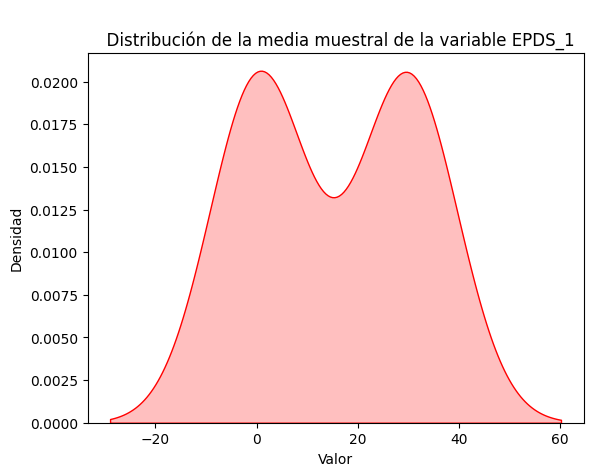

In [ ]:
muestreo(5,30,'EPDS_1')

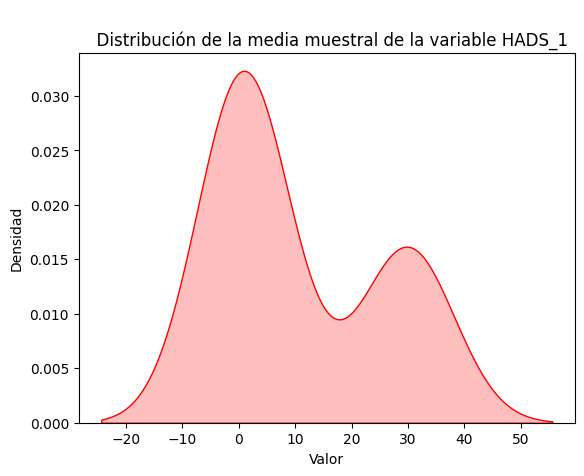

In [ ]:
muestreo(5,30,'HADS_1')

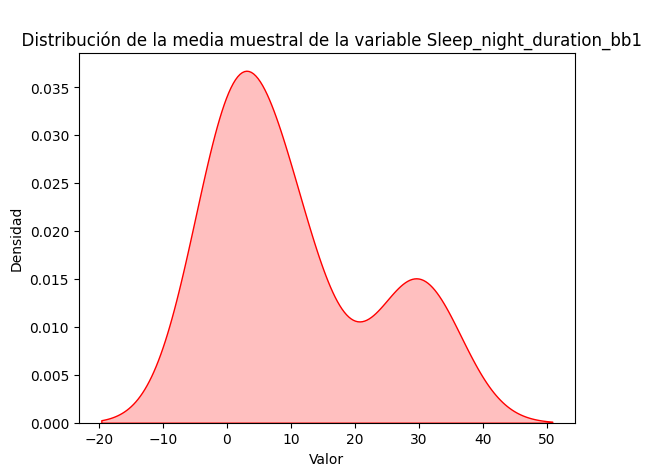

In [ ]:
muestreo(5,30,'Sleep_night_duration_bb1')

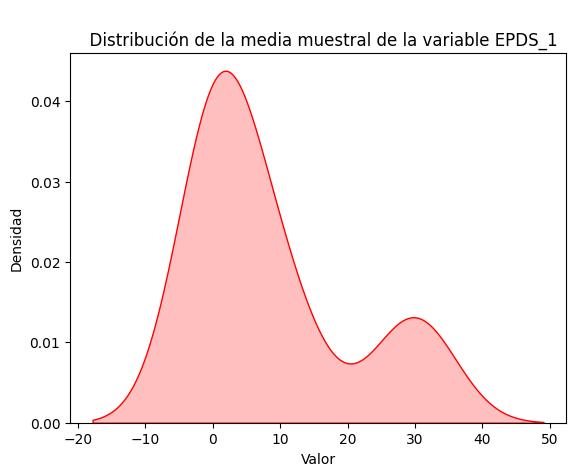

In [ ]:
muestreo(5,70,'EPDS_1')

## Teorema del Limite Central 

In [ ]:
medias_aleatorias = []
medias_estratificadas = []
medias_sistematicas = []

for _ in range(100):
    m_aleatoria = df2.sample(frac=0.3)
    m_estratificada = df2.groupby("Age").sample(frac=0.3)
    m_sistematica = m_sistematico(df2, 20, m_aleatoria.shape[0])
    
    medias_aleatorias.append(m_aleatoria.EPDS_1.mean())
    medias_estratificadas.append(m_estratificada.EPDS_1.mean())
    medias_sistematicas.append(m_sistematica.EPDS_1.mean())

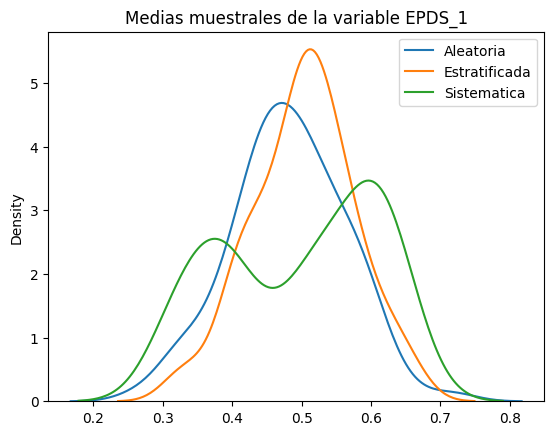

In [ ]:
sns.kdeplot(x=medias_aleatorias, label="Aleatoria")
sns.kdeplot(x=medias_estratificadas, label="Estratificada")
sns.kdeplot(x=medias_sistematicas, label="Sistematica")
plt.title("Medias muestrales de la variable EPDS_1")
plt.legend()
plt.savefig('TLC.png')

## Estimación

### Mayor que

In [ ]:
df2
valor_maximo = df2['Age'].max()
valor_minimo = df2['Age'].min()

print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo)

Valor máximo: 43
Valor mínimo: 19


* v = 20
$$P(\bar{X})>20$$

In [ ]:
valor_maximo = muestra_estratificada['Age'].max()
valor_minimo = muestra_estratificada['Age'].min()

print("Valor máximo:", valor_maximo)
print("Valor mínimo:", valor_minimo)

Valor máximo: 40
Valor mínimo: 20


In [ ]:
# Estimacion.
# Trabajaremos con la edad de la madre.

v = 20
x_bar = muestra_estratificada.Age.mean()
std_bar = muestra_estratificada.Age.std()
n = muestra_estratificada.shape[0]

Z_v = (v-x_bar)/(std_bar/np.sqrt(n))
Z_v

-18.02306428999624

In [ ]:
1 - st.norm.cdf(Z_v)

1.0

### Entre dos valores

$$30 < P(\bar{X}) < 35$$

In [ ]:
v1 = 30
v2 = 35
x_bar = muestra_estratificada.Age.mean()
std_bar = muestra_estratificada.Age.std()
n = muestra_estratificada.shape[0]

Z_v1 = (v1-x_bar)/(std_bar/np.sqrt(n))
Z_v2 = (v2-x_bar)/(std_bar/np.sqrt(n))

Z_v1, Z_v2

(0.48403174238536323, 9.737579758576164)

In [ ]:
st.norm.cdf(Z_v2) - st.norm.cdf(Z_v1)

0.31418167093403504

### Menor que

$$P(\bar{X}) < 35$$

In [ ]:
v = 35
x_bar = muestra_estratificada.Age.mean()
std_bar = muestra_estratificada.Age.std()
n = muestra_estratificada.shape[0]

Z_v = (v-x_bar)/(std_bar/np.sqrt(n))
Z_v

9.737579758576164

In [ ]:
st.norm.cdf(Z_v)

1.0

## Intervalo de confianza

In [68]:
confianza = 0.95
alpha = 1 - confianza

In [ ]:
# Revisaremos la proporcion del sexo del bebe (masculino) en el estado civil de la madre.

p_hombres = muestra_estratificada.loc[muestra_estratificada.sex_baby1 == 1, "Marital_status"].sum()/muestra_estratificada.Marital_status.sum()
p_hombres

0.5118110236220472

In [ ]:
std_p = np.sqrt((p_hombres*(1-p_hombres))/muestra_estratificada.Marital_status.sum())
std_p

0.04435544509543522

In [ ]:
z_al2 = st.norm.ppf(1-(alpha/2))
z_al2

1.959963984540054

In [ ]:
E = z_al2*std_p
E

0.08693507490529681

In [ ]:
p_hombres-E, p_hombres+E

(0.4248759487167504, 0.5987460985273441)

In [65]:
p_1_epds1 = muestra_estratificada.loc[muestra_estratificada.EPDS_1==1,"Age"].sum()/muestra_estratificada.Age.sum()
p_1_epds1

0.1893429901707191

In [66]:
std_p = np.sqrt((p_1_epds1*(1-p_1_epds1))/muestra_estratificada.Age.sum())
std_p

0.00891101674750732

In [69]:
z_al2 = st.norm.ppf(1-(alpha/2))
z_al2

1.959963984540054

In [70]:
E = z_al2*std_p
E

0.0174652718907476

In [71]:
p_1_epds1-E, p_1_epds1+E

(0.1718777182799715, 0.20680826206146669)

## Pruebas de Hipótesis

In [ ]:
confianza = 0.95
alpha = 1 - confianza

In [ ]:
'Correlación Pearson: ', df2.corr(method='pearson')['HADS_1']['Sleep_night_duration_bb1']

('Correlación Pearson: ', -0.26039496470561446)

In [ ]:
df2[['HADS_1','Sleep_night_duration_bb1']].corr()

,HADS_1,Sleep_night_duration_bb1
HADS_1,1.000000,-0.260395
Sleep_night_duration_bb1,-0.260395,1.000000


In [ ]:
import scipy.stats as stats

# Calcula el coeficiente de correlación y el valor p
correlation_coefficient, p_value = stats.pearsonr(df2.HADS_1, df2.Sleep_night_duration_bb1)

print("Coeficiente de correlación:", correlation_coefficient)
print("Valor p:", p_value)

Coeficiente de correlación: -0.2603949647056144
Valor p: 0.00011212669469465256


In [ ]:
# Establecer el nivel de significancia
nivel_significancia = 0.05

# Comparar el valor de prueba con el nivel de significancia
if p_value < nivel_significancia:
    print("Rechazar la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

Rechazar la hipótesis nula


## Datos bivariados

### Correlación

In [ ]:
# Obtener la matriz de correlación
correlation_matrix = df2[['HADS_1', 'Sleep_night_duration_bb1']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.savefig('corr2.png')
#plt.show()

### Diagramas de dispersión

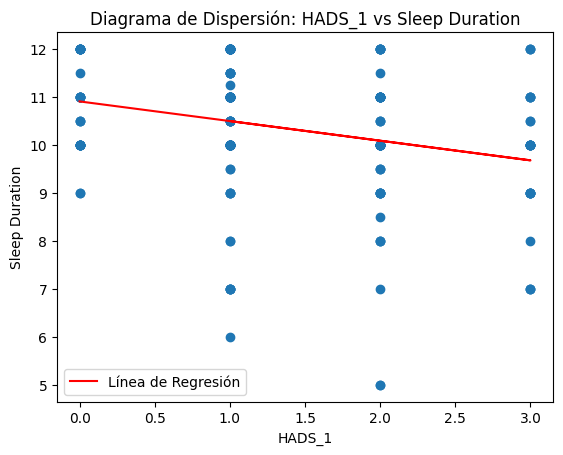

In [ ]:
hads_1 = df2['HADS_1']
sleep_duration = df2['Sleep_night_duration_bb1']

# Calcular la línea de regresión
slope, intercept, r_value, p_value, std_err = linregress(hads_1, sleep_duration)
regression_line = slope * hads_1 + intercept

plt.scatter(hads_1, sleep_duration)
plt.plot(hads_1, regression_line, color='red', label='Línea de Regresión')
plt.xlabel('HADS_1')
plt.ylabel('Sleep Duration')
plt.title('Diagrama de Dispersión: HADS_1 vs Sleep Duration')
plt.legend()
plt.savefig('dis.png')


In [ ]:
epds_1 = df2['EPDS_1']
sleep_duration = df2['Sleep_night_duration_bb1']
slope, intercept, r_value, p_value, std_err = linregress(sleep_duration, epds_1)
regression_line = slope * sleep_duration + intercept

plt.scatter(sleep_duration, epds_1)
plt.plot(sleep_duration, regression_line, color='red', label='Línea de Regresión')
plt.xlabel('Sleep Duration')
plt.ylabel('EPDS_1')
plt.title('Dispersión: EPDS_1 vs Sleep Duration')
plt.legend()
plt.show()

In [ ]:
age = df2['Age']
sleep_duration = df2['Sleep_night_duration_bb1']
slope, intercept, r_value, p_value, std_err = linregress(sleep_duration, age)
regression_line = slope * sleep_duration + intercept

plt.scatter(sleep_duration, age)
plt.plot(sleep_duration, regression_line, color='red', label='Línea de Regresión')
plt.xlabel('Sleep Duration')
plt.ylabel('Age')
plt.title('Dispersión: Age vs Sleep Duration')
plt.legend()
plt.show()

### Variable independiente y dependiente 

In [ ]:
correlation_matrix = df2[['HADS_1', 'Sleep_night_duration_bb1']].corr().corr()

correlation_table = correlation_matrix.stack().reset_index()
correlation_table.columns = ['Variable Independiente', 'Variable Dependiente', 'Correlación']
correlation_table = correlation_table.round(2)
correlation_table = correlation_table[correlation_table['Variable Independiente'] != correlation_table['Variable Dependiente']]
correlation_table = correlation_table.sort_values(by='Correlación', ascending=False)

print("Tabla de correlación:")
print(correlation_table)

In [ ]:
y = df2['Sleep_night_duration_bb1']
x = df2['HADS_1']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print("\nEcuación de la recta de regresión:")
print("y = {:.2f}x + {:.2f}".format(slope, intercept))



Ecuación de la recta de regresión:
y = -0.41x + 10.91


Correlación: -0.2603949647056139
Covarianza: -0.31204086068246006


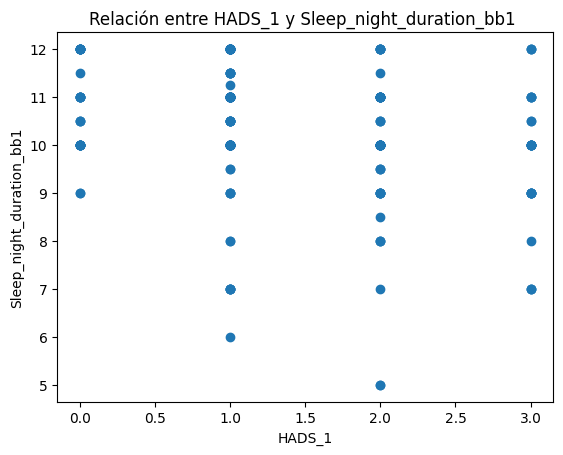

In [ ]:
hads = df2['HADS_1']
sleepDuration = df2['Sleep_night_duration_bb1']

correlation = np.corrcoef(hads, sleepDuration)[0, 1]
covariance = np.cov(hads, sleepDuration)[0, 1]

plt.scatter(hads, sleepDuration)
plt.xlabel('HADS_1')
plt.ylabel('Sleep_night_duration_bb1')
plt.title('Relación entre HADS_1 y Sleep_night_duration_bb1 ')
plt.savefig('relacion.png')

print('Correlación:', correlation)
print('Covarianza:', covariance)
